In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join
import librosa
from scipy.signal import wiener
from joblib import dump, load
from time import time
from datetime import datetime
import shutil 
import argparse
from functools import partial
import pickle
from IPython.display import Audio
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from pydub import AudioSegment
import pydub
from pathlib import Path
import simpleaudio

In [124]:
def import_data(data_path):
    
#     data_path = join(data_path,'original')
    
    with open(join(data_path,'sound_set.txt'), 'r') as f:
        data = np.array(f.read().split(','))
    audio_paths = [join(data_path,file+'.wav') for file in data]

    audio_data = np.array([ librosa.load(file, sr=SAMPLE)[0] for file in audio_paths ])
    return audio_data

## Load Data

In [250]:
# FOLDER = 'd_record_aj'
# FOLDER = 'd_record_mom'
# FOLDER = 'd_record_pat'
# FOLDER = 'd_record_kring'
# FOLDER = 'd_record_sorn'
# FOLDER = 'd_record_in'
# FOLDER = 'd_record_su'
# FOLDER = 'd_record_sorn_sis'
FOLDER = 'd_record_gam'
# FOLDER = 'd_record_plooktan'
# FOLDER = 'd_record_blank'
# FOLDER = 'd_record_set_1'

In [251]:
PARENT_PATH = '../../data/d_records/'
DATA_PATH = join(PARENT_PATH,FOLDER)
SAMPLE = 44100

In [252]:
audio = import_data(DATA_PATH)

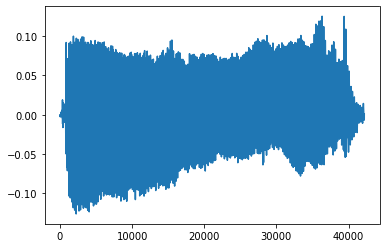

In [253]:
plt.plot(audio[1])

In [254]:
audio_amp = [(0.125/max(data))*data for data in audio]

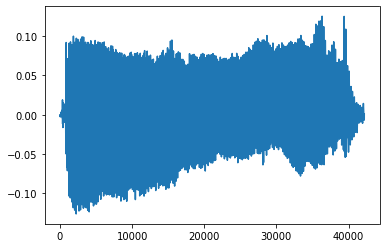

In [255]:
plt.plot(audio_amp[1])

In [256]:
audio_trim = [ librosa.effects.trim(data, top_db=20)[0] for data in audio_amp]

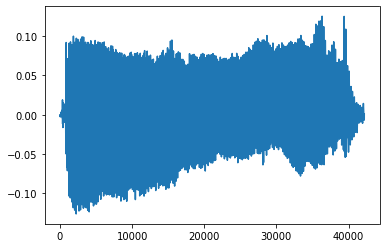

In [257]:
plt.plot(audio_trim[1])

In [258]:
audio_trim = [ sig[:int(1.3*SAMPLE)] if librosa.get_duration(sig) > 1.3 else sig for sig in audio_trim ]

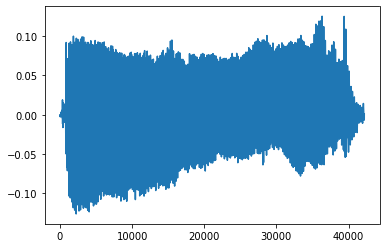

In [259]:
plt.plot(audio_trim[1])

In [260]:
_ = [scipy.io.wavfile.write(join(DATA_PATH,'sound{}.wav'.format(idx)), SAMPLE, sig) for idx, sig in enumerate(audio_trim)]

### Check Time Length

In [176]:
PARENT_PATH = '../../data/d_records/'
DATA_PATH = join(PARENT_PATH,FOLDER)
SAMPLE = 16000

In [195]:
FOLDER = 'd_record_set_8'
audio = import_data(DATA_PATH)
split = np.array([ (len(sig)/SAMPLE)/2 for sig in audio ])
sound = np.array([i for i in range(len(audio))])
gender = np.array(['M']*len(audio))
pd.DataFrame({'sound':sound, 'split': split, 'gender':gender}, index=None).to_csv('split_mark.csv', index=False)